<a href="https://colab.research.google.com/github/yaswanth-kumar-n/dsba6190-yaswanthkumar-deploymentlab/blob/main/NFCC_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import requests
import pandas as pd

# Your CFBD API key
api_key = 'mn8My2+XpGsfIACLnS4HEYD+ChTrShe5hXUYC2uKjG3G6Iln7ISP43NuLo3TZ2P9'

# Base URL for CFBD API
base_url = "https://api.collegefootballdata.com/plays"

# Parameters for Week 3 and Week 2 (no filtering by playType yet)
params_week_3 = {
    'seasonType': 'regular',
    'year': 2023,
    'week': 3,
    'classification': 'fbs'
}

params_week_2 = {
    'seasonType': 'regular',
    'year': 2023,
    'week': 2,
    'classification': 'fbs'
}

# Headers with API key for authentication
headers = {
    'Authorization': f'Bearer {api_key}'
}

# Function to get data from the API
def get_data(params):
    response = requests.get(base_url, params=params, headers=headers)
    if response.status_code == 200:
        return response.json()  # Return data as JSON
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return None

# Fetch data for Week 3 and Week 2
week_3_data = get_data(params_week_3)
week_2_data = get_data(params_week_2)

# Convert the JSON data for both weeks into DataFrames
def convert_to_dataframe(data, week_number):
    if data:
        # Add a 'week' column to distinguish between weeks
        for play in data:
            play['week'] = week_number
        return pd.DataFrame(data)
    else:
        return pd.DataFrame()

# Convert both weeks' data into DataFrames
week_3_df = convert_to_dataframe(week_3_data, 3)
week_2_df = convert_to_dataframe(week_2_data, 2)

# Combine the data into a single DataFrame
mixed_data_df = pd.concat([week_3_df, week_2_df], ignore_index=True)

# Filter the data to include only the relevant play types
relevant_play_types = [
    "Field Goal Good",
    "Field Goal Missed",
    "Blocked Field Goal",
    "Blocked Field Goal Touchdown",
    "Missed Field Goal Return"  # Added this play type
]

# Filter the data based on the 'play_type' column
filtered_data_df = mixed_data_df[mixed_data_df['play_type'].isin(relevant_play_types)]

# Display the filtered data
print(filtered_data_df.head())  # This will display the first few rows of the filtered data


                     id   offense offense_conference   defense  \
53   401520219102909601   Arizona             Pac-12      UTEP   
61   401520219102948601      UTEP     Conference USA   Arizona   
99   401520219103914001   Arizona             Pac-12      UTEP   
257  401520220102999901  Arkansas                SEC       BYU   
289  401520220103955601       BYU             Big 12  Arkansas   

    defense_conference      home  away  offense_score  defense_score  \
53      Conference USA   Arizona  UTEP              7              0   
61              Pac-12   Arizona  UTEP              3              7   
99      Conference USA   Arizona  UTEP             17              3   
257             Big 12  Arkansas   BYU             24             21   
289                SEC  Arkansas   BYU             24             31   

       game_id  ... yards_to_goal  down  distance  scoring yards_gained  \
53   401520219  ...            28     4         6    False           45   
61   401520219  ... 

               total_attempts  successful_attempts  probability_of_success
yards_to_goal                                                             
0                           1                    1                     1.0
1                           1                    1                     1.0
2                           7                    7                     1.0
3                           4                    4                     1.0
4                           9                    9                     1.0


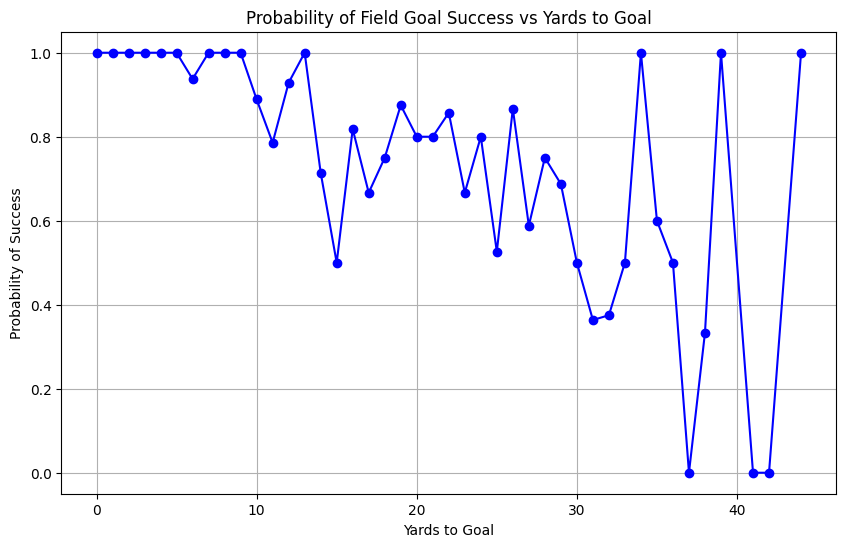

In [10]:
import pandas as pd

# Filter the data to only include successful and missed field goals
field_goal_data = filtered_data_df[filtered_data_df['play_type'].isin(['Field Goal Good', 'Field Goal Missed'])]

# Group by 'yards_to_goal' and calculate success rate
probability_data = field_goal_data.groupby('yards_to_goal').agg(
    total_attempts=('play_type', 'size'),  # Total number of attempts (good + missed)
    successful_attempts=('play_type', lambda x: (x == 'Field Goal Good').sum())  # Successful field goals (good)
)

# Calculate the probability of success for each distance
probability_data['probability_of_success'] = probability_data['successful_attempts'] / probability_data['total_attempts']

# Display the result
print(probability_data.head())  # Display the first few rows to see the probabilities

# Optionally, you can plot the probability vs yards to goal if needed:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(probability_data.index, probability_data['probability_of_success'], marker='o', linestyle='-', color='b')
plt.title('Probability of Field Goal Success vs Yards to Goal')
plt.xlabel('Yards to Goal')
plt.ylabel('Probability of Success')
plt.grid(True)
plt.show()
